In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
data = pd.read_csv('Organized_Data.csv')

In [3]:
# Drop the 'Datetime' column as it's not needed for the prediction
data = data.drop(columns=['Datetime'])

# Handle missing values by filling them with the mean of each column
# data = data.fillna(data.mean())
# Handle missing values by dropping them
data = data.dropna().reset_index(drop=True)

In [4]:
# Separate features and target variable
X = data.drop(columns=['nb_persons_SH'])
y = data['nb_persons_SH']

In [5]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Reshape the data for 1D CNN (samples, timesteps, features)
# Here, we assume each sample is a single timestep with multiple features
X = X.reshape((X.shape[0], X.shape[1], 1))


y= to_categorical(y, num_classes=int(y.max() + 1))

In [7]:
# Load the model from the HDF5 file
loaded_model = tf.keras.models.load_model('1DCNN_deepmodel_1024_2500epoch.keras')

In [8]:
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [9]:
# # Evaluate the loaded model to ensure it's working correctly
loaded_loss, loaded_accuracy = loaded_model.evaluate(X, y)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8843 - loss: 0.4538
Loaded model validation accuracy: 0.8861


In [10]:
y_pred = loaded_model.predict(X)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [11]:
y_pred_cat = np.argmax(y_pred, axis=1)
print(y_pred_cat)

[0 0 0 ... 0 0 0]


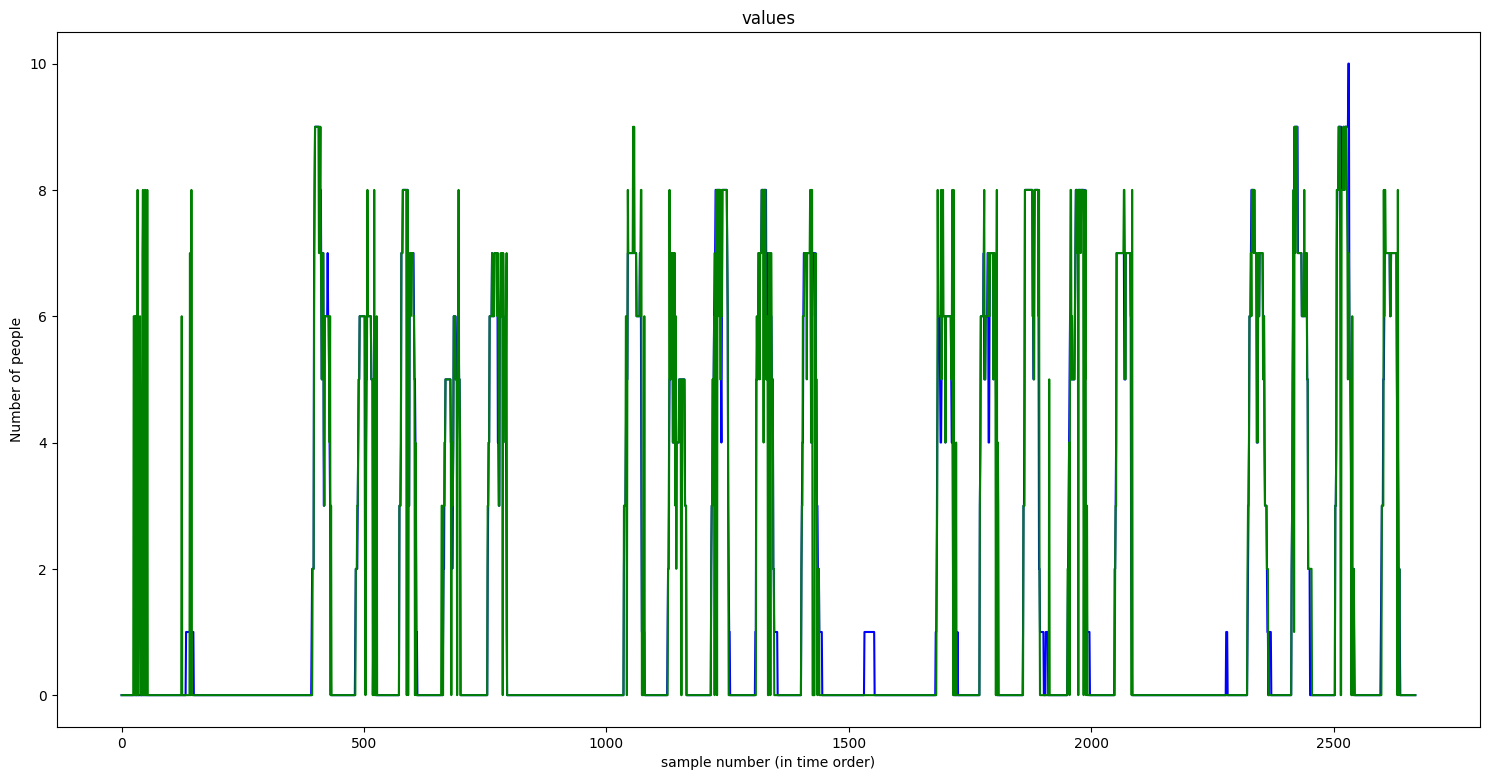

In [12]:
plt.close()
#plot 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
sns.lineplot(data['nb_persons_SH'],color='b',legend="brief")
sns.lineplot(y_pred_cat,color='g',legend="brief")
plt.title('values')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')
plt.tight_layout()
"real values"
"predicted values"
plt.show()